## **1. Extract Image Data**

In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from PIL import Image
import os
import tensorflow as tf

In [3]:
# Libraries version
print('Tensorflow version ', tf.__version__)
print('Pandas version ', pd.__version__)
print('Numpy version ', np.__version__)
print('Seaborn version ', sns.__version__)
print('Matplotlib version ', matplotlib.__version__)

Tensorflow version  2.11.0
Pandas version  1.3.5
Numpy version  1.21.6
Seaborn version  0.11.2
Matplotlib version  3.2.2


In [4]:
# Upgrade numpy for tensorflow 2.11.0 compatibility
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [ ]:
# Unzip image in flower folder
file_unzip = zipfile.ZipFile('/content/drive/MyDrive/Pendidikan/Data Science/Project/Tensorflow_Projects/Tensorflow Computer Vision/Flower Image Dataset.zip')
file_unzip.extractall()

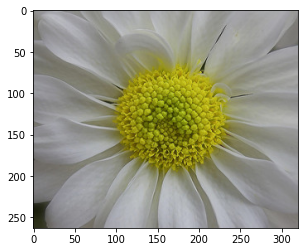

In [ ]:
# Visualize image
Visualize_test = Image.open('/content/flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(Visualize_test)

## **2. Image Preprocessing**

### **Define directory and labeling flower dataset**

In [ ]:
# Define image data directory
directory = '/content/flowers'

In [ ]:
dir_name = os.listdir(directory)

In [ ]:
# Define function for each type of flower
def flower_type(flower_name):
  type_flower = directory + '/' + flower_name
  return type_flower

In [ ]:
# Check how many files in each flower folder
amount_daisy = len(os.listdir(flower_type('daisy')))
amount_tulip = len(os.listdir(flower_type('tulip')))
amount_sunflower = len(os.listdir(flower_type('sunflower')))

print(f'Total files in daisy folder is {amount_daisy}')
print(f'Total files in tulip folder is {amount_tulip}')
print(f'Total files in sunflower folder is {amount_sunflower}')

Total files in daisy folder is 764
Total files in tulip folder is 984
Total files in sunflower folder is 733


In [ ]:
# Input file name of each flower
daisy_list = []
tulip_list = []
sunflower_list = []

for i in sorted(dir_name):
  for j in os.listdir(flower_type(i)):
    if i == 'daisy':
      daisy_list.append(j)
    elif i == 'sunflower':
      sunflower_list.append(j)
    elif i == 'tulip':
      tulip_list.append(j)

In [ ]:
# Remove some of flowers file
daisy_remove = ['2498632196_e47a472d5a.jpg',
'2520369272_1dcdb5a892_m.jpg',
'2612704455_efce1c2144_m.jpg',
'3275951182_d27921af97_n.jpg',
'3337643329_accc9b5426.jpg',
'3410906335_37e8a24b1c_n.jpg',
'3588872598_e0f9a1d2a1_m.jpg',
'3625257860_33efeef614_m.jpg',
'3711723108_65247a3170.jpg',
'4318007511_e9f4311936_n.jpg',
'3625257860_33efeef614_m.jpg',
'4584890753_14ea24a619_n.jpg',
'4820415253_15bc3b6833_n.jpg',
'4993492878_11fd4f5d12.jpg',
'5876455546_32049e5585.jpg',
'5896110423_e084b33401_n.jpg',
'5896680664_641de2de5a_n.jpg',
'5896679822_5f60d35c33_n.jpg',
'5896680664_641de2de5a_n.jpg',
'5904946193_bd1eb1f39d_n.jpg',
'5905502226_bb23bd8fa0_n.jpg',
'5905504340_1d60fa9611_n.jpg',
'5948835387_5a98d39eff_m.jpg',
'5981645737_29eceac291_m.jpg',
'6323721068_3d3394af6d_n.jpg',
'7924174040_444d5bbb8a.jpg',
'8322526877_95d1c0f8bc_n.jpg',
'8759177308_951790e00d_m.jpg',
'8938566373_d129e7af75.jpg',
'9346508462_f0af3163f4.jpg',
'14221848160_7f0a37c395.jpg',
'14307766919_fac3c37a6b_m.jpg',
'14554906452_35f066ffe9_n.jpg',
'14591326135_930703dbed_m.jpg',
'15100730728_a450c5f422_n.jpg',
'16323838000_3818bce5c6_n.jpg',
'16482676953_5296227d40_n.jpg',
'18195689904_46619b7e16_n.jpg',
'21402054779_759366efb0_n.jpg',
'29380234244_c50a60374e_n.jpg',
'29821115270_eccd3866e1_n.jpg',
'33807950584_f5b63715e4_n.jpg',
'33809174824_00ba798039_n.jpg',
'33810542134_a493f19a71_n.jpg',
'33843240613_0b736f9896_n.jpg',
'33849854704_d2a2415e4d_n.jpg',
'33857335804_7f0c96243b_n.jpg',
'33859244503_eeeca6a397_n.jpg',
'33871813063_d7b6bedafe_n.jpg',
'33872893913_72d64a9b85_n.jpg',
'33885735373_444ba02d9c_n.jpg',
'33901756843_94e198d40e_n.jpg',
'34076975155_1faeedec90_n.jpg',
'34510103621_250ee7ae64_n.jpg',
'34517409722_829ec7e152_n.jpg',
'34566613262_fefbcc279a_n.jpg',
'34643914016_2e659d6e82_n.jpg',
'34665595995_13f76d5b60_n.jpg',
'34733243845_29f1c30634_n.jpg']

tulip_remove = [
'107693873_86021ac4ea_n.jpg',
'164578909_51f245d3fa_n.jpg',
'133960364_d87f883c15_n.jpg',
'2271507463_15c48d41c4_n.jpg',
'2374855021_21959b40c0_n.jpg',
'3186520634_30e1c67aa5_n.jpg',
'3422915985_9bf7264d36.jpg',
'3540595981_73f14d1227_n.jpg',
'3601085193_de1195d3d7_n.jpg',
'4522130258_9ee44cf73f_m.jpg',
'4602809199_d3030cef01_m.jpg',
'4624404489_11e10fcd33_n.jpg',
'4838669164_ffb6f67139.jpg',
'4890786831_91bb82a9e4_n.jpg',
'5012813078_99fb977616_n.jpg',
'5388013398_09a8a0f166_m.jpg',
'5433747333_869a2a172d_m.jpg',
'5443985113_54e9f608b3_n.jpg',
'5470898169_52a5ab876c_n.jpg',
'5628970369_54eb9ed31c_n.jpg',
'5687705933_55a8c2dbac.jpg',
'5700394524_dc6f8fa9cd_n.jpg',
'6325571510_7544b27e57_n.jpg',
'6539831765_c21b68910e_n.jpg',
'6770436217_281da51e49_n.jpg',
'6931748252_68f06086b3.jpg',
'7042692841_f323799c0d.jpg',
'7064778965_ddcc6ee9f2.jpg',
'7064813645_f7f48fb527.jpg',
'7068715863_a534ac7884_n.jpg',
'7069622551_348d41c327_n.jpg',
'7266196114_c2a736a15a_m.jpg',
'7481204112_e3c57dd40a_n.jpg',
'8585102511_fc452e6700_n.jpg',
'8585102913_d80d3e2ff7_n.jpg',
'8585103457_d64697c3cf_n.jpg',
'8586204750_2891bd2ec9_n.jpg',
'8586205168_8294e67195_n.jpg',
'8586205446_8953a6c70e_n.jpg',
'8586205946_cda045f3f8_n.jpg',
'8619064872_dea79a9eb9.jpg',
'8623170936_83f4152431.jpg',
'8623173256_3f0eb4c506.jpg',
'8668973377_c69527db42_m.jpg',
'8668974855_8389ecbdca_m.jpg',
'8702982836_75222725d7.jpg',
'8708856019_f3be2353a4_n.jpg',
'8712268519_f4c2c39a06_n.jpg',
'8713398114_bc96f1b624_n.jpg',
'8717900362_2aa508e9e5.jpg',
'8733586143_3139db6e9e_n.jpg',
'8892851067_79242a7362_n.jpg',
'8838983024_5c1a767878_n.jpg',
'9947374414_fdf1d0861c_n.jpg',
'10686568196_b1915544a8.jpg',
'12517756805_56b74be742.jpg',
'13472141763_f2517e7f0d.jpg',
'13472387874_d844478dbb.jpg',
'13509967925_eaaeefa396_m.jpg',
'13514136074_ab1b827e4f.jpg',
'13539404903_cd113e3e9b.jpg',
'13539827514_79b60b6c22_n.jpg',
'13903937027_44b9f2f5b8.jpg',
'13953090784_0c7d7a904e.jpg',
'14027372499_30f934d24f_m.jpg',
'14073608876_49db8ac97d_n.jpg',
'14084749296_6143c74c72_m.jpg',
'14087425312_2b5846b570_n.jpg',
'14097328354_4f1469a170.jpg',
'14103897845_7986002615.jpg',
'14116780333_7836f4448c.jpg',
'14149603605_eedfe9678c_n.jpg',
'14255917256_84c23c572b.jpg',
'14270573963_f122c40438.jpg',
'14278331403_4c475f9a9b.jpg',
'14487705209_ea723109e1_m.jpg',
'14487712670_aebe715525_m.jpg',
'14487762578_baba13d16a_m.jpg',
'14487943607_651e8062a1_m.jpg',
'14651383746_419dc73634_m.jpg',
'14651385476_7ccb20e594_m.jpg',
'14671196461_b725727229_m.jpg',
'14674067742_73c2602aa6_m.jpg',
'14674071872_2df55466d5_m.jpg',
'14674388855_2da18e375a_m.jpg',
'14674389605_df3c0bcfa1_m.jpg',
'14836105101_1d07520932_m.jpg',
'15147464747_594599c855_m.jpg',
'15147473067_7c5498eb0e_m.jpg',
'15275144259_f9a18ec9cb.jpg',
'15275478257_fbd5850708_n.jpg',
'15275504998_ca9eb82998.jpg',
'15632065904_0d9caf174b.jpg',
'15922772266_1167a06620.jpg',
'16133946004_2e935d9433_n.jpg',
'16169741783_deeab1a679_m.jpg',
'16582481123_06e8e6b966_n.jpg',
'16680998737_6f6225fe36.jpg',
'16702188449_3dacce90b2_m.jpg',
'16756198195_13b54e70b3_n.jpg',
'16862374316_4135908d4c_m.jpg',
'16862422576_5226e8d1d0.jpg',
'16907559551_05ded87fb2_n.jpg',
'16986144192_55e0e6c152.jpg',
'17408197905_829c4d7940_m.jpg',
'17545306218_5bf0ee38cd_n.jpg',
'17720403638_94cfcd8d5c_n.jpg',
'17730239562_9aa0fc0738_n.jpg',
'17844723633_da85357fe3.jpg',
'17907238905_1ae121f8d9_m.jpg',
'17908793211_ff0f1f81d3_n.jpg',
'20096276219_7d16867bcc_n.jpg',
'25429468133_6bfba75d94_n.jpg',
'25429501953_a1f9ce09e6_n.jpg',
'25759191500_1c0da35828_n.jpg',
'26564770956_ac4800ae85_n.jpg',
'26685648806_c76dd583b9_n.jpg',
'32465197894_71dde519ae_n.jpg']

sunflower_remove = [
'210076535_80951bc5d5.jpg',
'215798354_429de28c2d.jpg',
'265422922_bbbde781d2_m.jpg',
'969913643_9d5cd2fe45_m.jpg',
'1240626292_52cd5d7fb1_m.jpg',
'1267876087_a1b3c63dc9.jpg',
'2575272111_f04d79b9af_n.jpg',
'2598973480_07de93e91d_n.jpg',
'2694860538_b95d60122c_m.jpg',
'2733109082_1351f6738a_n.jpg',
'2816256710_a2d3616fae.jpg',
'2823659190_afdabee45c.jpg',
'2979297519_17a08b37f6_m.jpg',
'3196753837_411b03682d_n.jpg',
'3749090865_b90f28a585_n.jpg',
'3749091071_c146b33c74_n.jpg',
'3815322974_52c12dbde3.jpg',
'3846907701_e13b66aa87.jpg',
'3848405800_8eea982c40.jpg',
'3858508462_db2b9692d1.jpg',
'3950020811_dab89bebc0_n.jpg',
'4414080766_5116e8084e.jpg',
'4414081772_8a0e8a1327.jpg',
'4414083164_3f285f8ac5.jpg',
'4414084638_03d2db38ae.jpg',
'4528959364_fa544b0f4e_m.jpg',
'4794180388_c7b9294aef_n.jpg',
'4795924955_202448d8ea_n.jpg',
'4902448474_6850b85765_n.jpg',
'4914793782_d0ea760791.jpg',
'5027895361_ace3b731e5_n.jpg',
'5067864967_19928ca94c_m.jpg',
'5293283002_9b17f085f7_m.jpg',
'5437996076_cf7e2ac32e_n.jpg',
'5492906452_80943bfd04.jpg',
'5957186948_b2afd80d70_n.jpg',
'5963905278_6a8efc6b27_n.jpg',
'5967283168_90dd4daf28_n.jpg',
'6002598514_22a9a404c7_n.jpg',
'6056460102_f5569092a6_n.jpg',
'6112510436_9fe06e695a_n.jpg',
'7176729016_d73ff2211e.jpg',
'7857605684_fc86440c23.jpg',
'8014734302_65c6e83bb4_m.jpg',
'8014735546_3db46bb1fe_n.jpg',
'8021568040_f891223c44_n.jpg',
'8481979626_98c9f88848_n.jpg',
'9231555352_d2dd8f8e68_m.jpg',
'9825716455_f12bcc8d4e_n.jpg',
'9904127656_f76a5a4811_m.jpg',
'12323859023_447387dbf0_n.jpg',
'13648603305_1268eda8b7_n.jpg',
'14889392928_9742aed45b_m.jpg',
'15683877266_42e0fe3782_n.jpg',
'19710076021_f5bb162540.jpg',
'19756232959_17cde3b9f0_m.jpg',
'20148493928_9f75a99783.jpg',
'21374127408_5ffbe87bb2.jpg',
'23645265812_24352ff6bf.jpg',
'28664252816_1f24388ee6_n.jpg']

In [ ]:
# Remove some of flowers
for i in daisy_list.copy():
  if i in (daisy_remove):
    daisy_list.remove(i)

for j in sunflower_list.copy():
  if j in sunflower_remove:
    sunflower_list.remove(j)

for k in tulip_list.copy():
  if k in tulip_remove:
    tulip_list.remove(k)

In [ ]:
len(daisy_list), len(sunflower_list), len(tulip_list)

(707, 673, 866)

In [ ]:
# Rename file with path of each flower
for i in range(len(daisy_list)):
  daisy_list[i] = flower_type('daisy') + '/' + daisy_list[i]

for j in range(len(sunflower_list)):
  sunflower_list[j] = flower_type('sunflower') + '/' + sunflower_list[j]

for k in range(len(tulip_list)):
  tulip_list[k] = flower_type('tulip') + '/' + tulip_list[k]

In [ ]:
# Create dataframe of each flower and combine them
daisy_df = pd.DataFrame({
    'Flower_path' : daisy_list,
    'Flower_name' : 'daisy'
})

tulip_df = pd.DataFrame({
    'Flower_path' : tulip_list,
    'Flower_name' : 'tulip'
})

sunflower_df = pd.DataFrame({
    'Flower_path' : sunflower_list,
    'Flower_name' : 'sunflower'
})

df = pd.concat([daisy_df, tulip_df, sunflower_df], axis=0, ignore_index=True)

In [ ]:
df

,Flower_path,Flower_name
0,/content/flowers/daisy/4865691548_00319261b8.jpg,daisy
1,/content/flowers/daisy/7568630428_8cf0fc16ff_n...,daisy
2,/content/flowers/daisy/5435522104_1d6a61b431_n...,daisy
3,/content/flowers/daisy/7377004908_5bc0cde347_n...,daisy
4,/content/flowers/daisy/34532930772_5cc5fc600d_...,daisy
...,...,...
2241,/content/flowers/sunflower/4186808407_06688641...,sunflower
2242,/content/flowers/sunflower/4664737020_b4c61aac...,sunflower
2243,/content/flowers/sunflower/5025805406_033cb034...,sunflower
2244,/content/flowers/sunflower/4746643626_02b2d056...,sunflower


In [ ]:
df['Flower_name'].unique()

array(['daisy', 'tulip', 'sunflower'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flower_path  2246 non-null   object
 1   Flower_name  2246 non-null   object
dtypes: object(2)
memory usage: 35.2+ KB


tulip


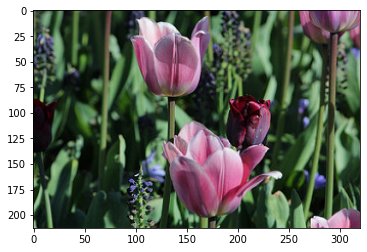

In [ ]:
# Test labeling
print(df['Flower_name'][800])
plt.imshow(Image.open(df['Flower_path'][800]))

### **Feature Engineering**

In [ ]:
# Label encoding (one hot encoding)
df = pd.get_dummies(df, columns=['Flower_name'])

## **3. Model Building**

### **Pre modelling**

In [ ]:
len(daisy_list), len(tulip_list), len(sunflower_list)

(707, 866, 673)

In [ ]:
df_model = df.copy()

In [ ]:
# Separate data of each flower
df_model_daisy = df_model.iloc[0:707]
df_model_tulip = df_model.iloc[707:1573]
df_model_sunflower = df_model.iloc[1573:]

df_model_daisy = df_model_daisy.reset_index(drop=True)
df_model_tulip = df_model_tulip.reset_index(drop=True)
df_model_sunflower = df_model_sunflower.reset_index(drop=True)

In [ ]:
df_model_daisy

,Flower_path,Flower_name_daisy,Flower_name_sunflower,Flower_name_tulip
0,/content/flowers/daisy/4865691548_00319261b8.jpg,1,0,0
1,/content/flowers/daisy/7568630428_8cf0fc16ff_n...,1,0,0
2,/content/flowers/daisy/5435522104_1d6a61b431_n...,1,0,0
3,/content/flowers/daisy/7377004908_5bc0cde347_n...,1,0,0
4,/content/flowers/daisy/34532930772_5cc5fc600d_...,1,0,0
...,...,...,...,...
702,/content/flowers/daisy/5574421625_61b1f49b3f_m...,1,0,0
703,/content/flowers/daisy/21652746_cc379e0eea_m.jpg,1,0,0
704,/content/flowers/daisy/20580471306_ab5a011b15_...,1,0,0
705,/content/flowers/daisy/8706810197_17b6c1f1e7.jpg,1,0,0


In [ ]:
# Separate data into train and test for each flower
train_daisy = df_model_daisy[0:600]
test_daisy = df_model_daisy[600:]

train_tulip = df_model_tulip[0:700]
test_tulip = df_model_tulip[700:]

train_sunflower = df_model_sunflower[0:500]
test_sunflower = df_model_sunflower[500:]

train = pd.concat([train_daisy, train_tulip, train_sunflower], axis=0, ignore_index=True)
test = pd.concat([test_daisy, test_tulip, test_sunflower], axis=0, ignore_index=True)

In [ ]:
train

,Flower_path,Flower_name_daisy,Flower_name_sunflower,Flower_name_tulip
0,/content/flowers/daisy/4865691548_00319261b8.jpg,1,0,0
1,/content/flowers/daisy/7568630428_8cf0fc16ff_n...,1,0,0
2,/content/flowers/daisy/5435522104_1d6a61b431_n...,1,0,0
3,/content/flowers/daisy/7377004908_5bc0cde347_n...,1,0,0
4,/content/flowers/daisy/34532930772_5cc5fc600d_...,1,0,0
...,...,...,...,...
1795,/content/flowers/sunflower/4745980581_a0b75852...,0,1,0
1796,/content/flowers/sunflower/4489516263_e49fe826...,0,1,0
1797,/content/flowers/sunflower/21518663809_3d69f5b...,0,1,0
1798,/content/flowers/sunflower/877083343_e3338c412...,0,1,0


In [ ]:
# Load image and change image data into array type
import tensorflow as tf
from tensorflow import keras
x_train = []
for i in range(len(train['Flower_path'])):
  img = tf.keras.utils.load_img(train['Flower_path'][i], target_size=(200,200,3))
  img = tf.keras.utils.img_to_array(img)
  img = img/255
  x_train.append(img)
x_train = np.array(x_train)

In [ ]:
x_test = []
for i in range(len(test['Flower_path'])):
  img = tf.keras.utils.load_img(test['Flower_path'][i], target_size=(200,200,3))
  img = tf.keras.utils.img_to_array(img)
  img = img/255
  x_test.append(img)
x_test = np.array(x_test)

In [ ]:
# Define label
y_train = train.drop(columns=['Flower_path'], axis=1).values
y_test = test.drop(columns=['Flower_path'], axis=1).values

In [ ]:
y_train.shape, y_test.shape

((1800, 3), (446, 3))

In [ ]:
x_train.shape, x_test.shape

((1800, 200, 200, 3), (446, 200, 200, 3))

### **Modelling**

In [ ]:
# creating model
Base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False)
Base_model.trainable = False

Input = tf.keras.layers.Input(shape=(200,200,3))
x = Base_model(Input, training=False)
x = tf.keras.layers.Flatten()(x)
Output = tf.keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(Input, Output)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 46080)             0         
                                                                 
 dense (Dense)               (None, 3)                 138243    
                                                                 
Total params: 2,396,227
Trainable params: 138,243
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
# Fit model
model.fit(x_train, y_train,
          epochs=10,
          batch_size=40,
          validation_data=(x_test, y_test))

Epoch 1/10
45/45 [==============================] - 14s 100ms/step - loss: 1.1517 - accuracy: 0.8483 - val_loss: 0.4842 - val_accuracy: 0.9260
Epoch 2/10
45/45 [==============================] - 3s 59ms/step - loss: 0.2335 - accuracy: 0.9578 - val_loss: 0.3791 - val_accuracy: 0.9350
Epoch 3/10
45/45 [==============================] - 3s 62ms/step - loss: 0.0537 - accuracy: 0.9889 - val_loss: 0.3893 - val_accuracy: 0.9350
Epoch 4/10
45/45 [==============================] - 3s 57ms/step - loss: 0.0286 - accuracy: 0.9933 - val_loss: 0.4302 - val_accuracy: 0.9372
Epoch 5/10
45/45 [==============================] - 3s 58ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.3765 - val_accuracy: 0.9350
Epoch 6/10
45/45 [==============================] - 3s 60ms/step - loss: 0.0020 - accuracy: 0.9989 - val_loss: 0.3649 - val_accuracy: 0.9484
Epoch 7/10
45/45 [==============================] - 3s 63ms/step - loss: 1.1734e-04 - accuracy: 1.0000 - val_loss: 0.3574 - val_accuracy: 0.9484
Epoch 8

In [ ]:
# Save model
from keras.models import load_model
model.save('Flower_model.h5')

In [ ]:
# Load model for testing
model_load = load_model('Flower_model.h5')
prediction = model_load.predict(x_train)

57/57 [==============================] - 3s 32ms/step


In [ ]:
prediction.shape

(1800, 3)